In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import  ImageDataGenerator as Imgen

In [15]:
#Augmenting the training dataset
traingen = Imgen(
                 rescale=1./255,
                 shear_range= 0.2,
                 zoom_range = 0.3,
                 width_shift_range = 0.2,
                 height_shift_range  =0.2,
                 fill_mode = "nearest",
                 validation_split=0.15,
    
                 )

#Augmenting the testing dataset
testgen = Imgen(# rescale the images to 1./255 
                rescale = 1./255
                )

In [16]:
#Augmenting the testing dataset
#Now, we will take the path to a directory & generate batches of augmented data.
trainds = traingen.flow_from_directory("C:/Users/karth/dlai_assgn/archive/Training",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                       subset="training"
                                      )
                                      
valds = traingen.flow_from_directory("C:/Users/karth/dlai_assgn/archive/Training",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     subset="validation"
                                      )

testds = testgen.flow_from_directory("C:/Users/karth/dlai_assgn/archive/Testing",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)

Found 4857 images belonging to 4 classes.
Found 855 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [17]:
#To identify the classes of our dataset
c = trainds.class_indices
classes = list(c.keys())
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [18]:
x,y = next(trainds)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot    
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()                                  #shows the figure or plot

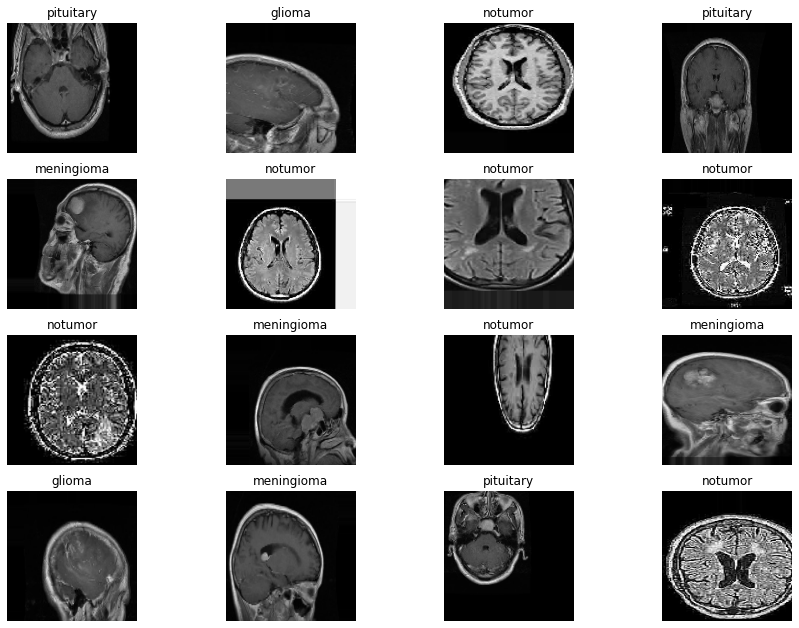

In [19]:
#Call the plotImages function
plotImages(x,y)

In [20]:
#To build the model, let’s first import the necessary libraries that we would need to create the model.

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

In [21]:
#CNN Model
cnn = Sequential([
    # first Layer
    Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    MaxPooling2D((2, 2)),
    # second layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

In [22]:
#Following is the architecture of the created model.

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 130, 130, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 65, 65, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 65, 65, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)            

In [23]:
#Compile the model created with the help of the following parameters,

cnn.compile(loss="categorical_crossentropy",optimizer = "Adam",metrics=["accuracy"])

In [24]:
#Let’s fit our data to the CNN model we created.

history = cnn.fit(trainds,validation_data=valds,epochs=5, batch_size=16, verbose=1)

Epoch 1/5
304/304 [==============================] - 106s 339ms/step - loss: 1.0170 - accuracy: 0.5368 - val_loss: 0.9700 - val_accuracy: 0.6503
Epoch 2/5
304/304 [==============================] - 103s 337ms/step - loss: 0.8154 - accuracy: 0.6658 - val_loss: 0.9072 - val_accuracy: 0.6573
Epoch 3/5
304/304 [==============================] - 103s 339ms/step - loss: 0.7345 - accuracy: 0.6988 - val_loss: 0.9614 - val_accuracy: 0.6363
Epoch 4/5
304/304 [==============================] - 103s 337ms/step - loss: 0.6933 - accuracy: 0.7206 - val_loss: 0.8673 - val_accuracy: 0.6678
Epoch 5/5
304/304 [==============================] - 101s 331ms/step - loss: 0.6656 - accuracy: 0.7330 - val_loss: 0.8307 - val_accuracy: 0.6725


In [26]:
cnn.evaluate(testds)

82/82 [==============================] - 8s 94ms/step - loss: 1.4641 - accuracy: 0.4508


[1.4641122817993164, 0.45080092549324036]

<Figure size 432x288 with 0 Axes>

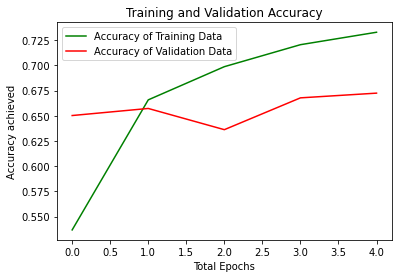

<Figure size 432x288 with 0 Axes>

In [27]:
#Visualization using deep learning
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

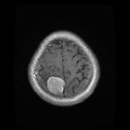

In [28]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
data = np.ndarray(shape=(1, 130, 130, 3), dtype=np.float32)
image = Image.open("C:/Users/karth/dlai_assgn/archive/Training/meningioma/Tr-me_0069.jpg")
size = (130, 130)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [29]:
prediction = cnn.predict(data)
print(prediction)



1/1 [==============================] - 0s 220ms/step
[[0. 0. 1. 0.]]


In [30]:
predict_index = np.argmax(prediction)
print(predict_index)

2
